We’ll use the 'Russian housing market' dataset from Kaggle.
First, let’s take a look at the data in Python.

In [ ]:
import pandas as pd
df = pd.read_csv('') # renamed from the csv file within train.csv.zip on Kaggle

df.info(verbose=True)

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28895 entries, 0 to 28894
Data columns (total 292 columns):
 #    Column                                 Dtype  
---   ------                                 -----  
 0    id                                     int64  
 1    timestamp                              object 
 2    full_sq                                int64  
 3    life_sq                                float64
 4    floor                                  float64
 5    max_floor                              float64
 6    material                               float64
 7    build_year                             float64
 8    num_room                               float64
 9    kitch_sq                               float64
 10   state                                  float64
 11   product_type                           object 
 12   sub_area                               object 
 13   area_m                                 float64
 14   raion_popul                         

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


We can also identify the numeric and non-numeric columns. These are necessary since we often treat them using different methods.

In [6]:
numeric_cols = df.select_dtypes(include=['number']).columns
print(numeric_cols)

non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

Index(['id', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material',
       'build_year', 'num_room', 'kitch_sq', 'state',
       ...
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high', 'big_church_count_5000',
       'church_count_5000', 'mosque_count_5000', 'leisure_count_5000',
       'sport_count_5000', 'market_count_5000', 'price_doc'],
      dtype='object', length=276)
Index(['timestamp', 'product_type', 'sub_area', 'culture_objects_top_25',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion',
       'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion',
       'water_1line', 'big_road1_1line', 'railroad_1line', 'ecology'],
      dtype='object')


## Missing data
Missing data or missing values are when there’s no data value stored for a column in a row. It is very common among real-world datasets. If not handled properly, they would significantly impact the results of data analysis. Many machine learning models can’t tolerate any missing values. So, we must learn how to handle missing data.

#### Method #1: missing data (by columns) count & percentage
This is the most basic method to detect missing data among columns.
We print out the summary of all the non-numeric columns below. By looking at the Non-Null Count, we can spot the number of missing data by columns. For our example, all non-null counts are 30,471, the same as the total number of rows, so there are no missing data among the non-numeric columns!

In [7]:
df[non_numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28895 entries, 0 to 28894
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   timestamp                  28895 non-null  object
 1   product_type               28895 non-null  object
 2   sub_area                   28895 non-null  object
 3   culture_objects_top_25     28895 non-null  object
 4   thermal_power_plant_raion  28895 non-null  object
 5   incineration_raion         28895 non-null  object
 6   oil_chemistry_raion        28895 non-null  object
 7   radiation_raion            28895 non-null  object
 8   railroad_terminal_raion    28895 non-null  object
 9   big_market_raion           28895 non-null  object
 10  nuclear_reactor_raion      28895 non-null  object
 11  detention_facility_raion   28895 non-null  object
 12  water_1line                28895 non-null  object
 13  big_road1_1line            28895 non-null  object
 14  railro

We can print out the first 10 columns to look at.

In [8]:
num_missing = df.isna().sum()
num_missing[:10]

id                0
timestamp         0
full_sq           0
life_sq        5437
floor           166
max_floor      9560
material       9560
build_year    12706
num_room       9560
kitch_sq       9560
dtype: int64

In [9]:
pct_missing = df.isna().mean()
pct_missing[:10]

id            0.000000
timestamp     0.000000
full_sq       0.000000
life_sq       0.188164
floor         0.005745
max_floor     0.330853
material      0.330853
build_year    0.439730
num_room      0.330853
kitch_sq      0.330853
dtype: float64

#### Method #2: missing data (by columns) heatmap
The seaborn library is a popular statistical data visualization library. Let’s first use it to plot the missing data heatmap.

<Axes: >

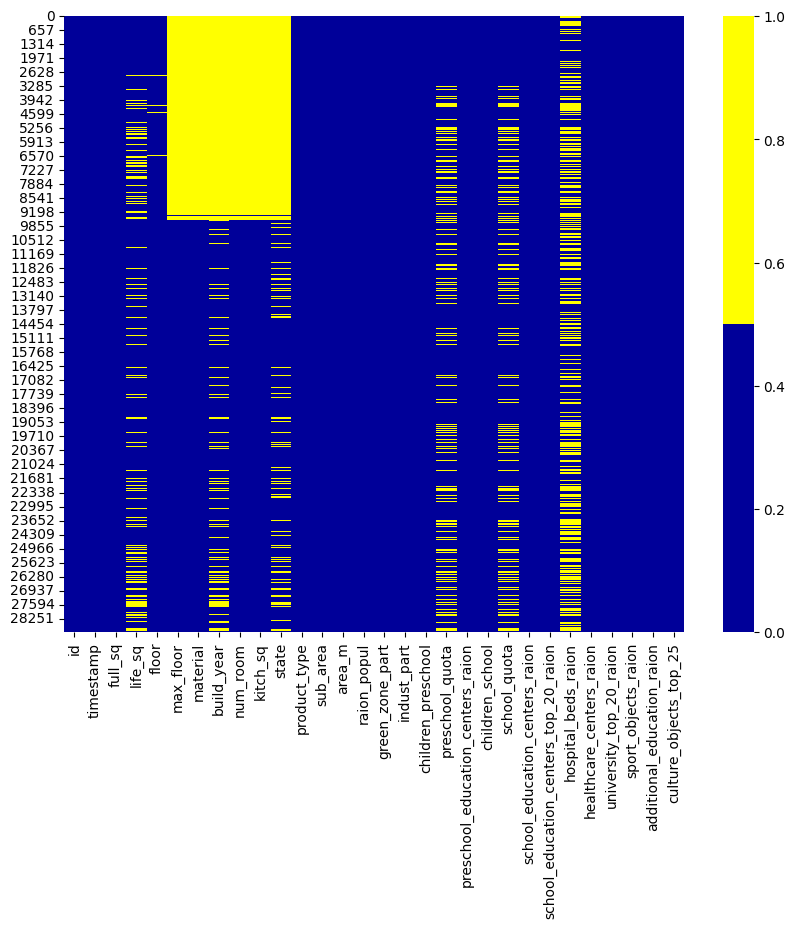

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

cols = df.columns[:30]
colours = ['#000099', '#ffff00'] # specify colours: yellow - missing. blue - not missing
sns.heatmap(df[cols].isna(), cmap=sns.color_palette(colours))

#### Method #3: missing data (by rows) histogram
We’ve been looking at missing data by columns. But we can also summarize the missing data by rows. Missing data histogram is a technique for summarizing such information.

<Axes: >

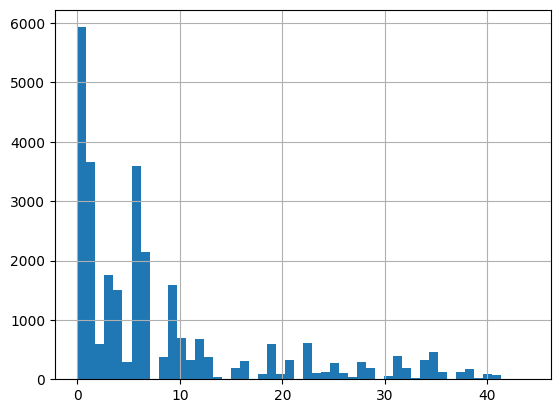

In [11]:
missing_by_row = df.isna().sum(axis='columns')
missing_by_row.hist(bins=50)

### What to do?
There are NO agreed-upon solutions to dealing with missing data. We have to study the dataset and its specific columns to determine how to clean their missing values.

#### Technique #1: drop columns / features
We drop the entire column or feature with missing data, which will certainly cause a loss of information. So we should only perform this when we are sure that the missing data is not informative. 

In [12]:
pct_missing[pct_missing > .3] # What are the columns with over 30% missing data then apply the copy method to make a copy to the new DataFrame df_less_missing_cols. 
df_less_missing_cols = df.loc[:, pct_missing <= .3].copy() # equivalent to df.drop(columns=pct_missing[pct_missing > .3].index)
df_less_missing_cols.shape

(28895, 282)

#### Technique #2: drop rows / observations
We can drop the entire row with missing data like the first technique. Again, please be aware of the loss of information when removing rows.

In [13]:
df_less_missing_rows = df[missing_by_row < 35].copy()
df_less_missing_rows.shape # equivalent to df.dropna(axis='index', thresh=292-35+1).shape

(27830, 292)

#### Technique #3: impute the missing with constant values
Instead of dropping data, we can also replace the missing. An easy method is to impute the missing with constant values. For example, we can impute the numeric columns with a value of -999 and impute the non-numeric columns with ‘_MISSING_’.

In [14]:
df_copy = df.copy()
df_copy[numeric_cols] = df_copy[numeric_cols].fillna(-999)
df_copy[non_numeric_cols] = df_copy[non_numeric_cols].fillna('_MISSING_')

#### Technique #4: impute the missing with statistics
Besides constants, we can also impute the missing values with statistics.
For example, we can impute the numeric columns with their respective medians.

In [15]:
df_copy = df.copy()
med = df_copy[numeric_cols].median()
df_copy[numeric_cols] = df_copy[numeric_cols].fillna(med)

We can also impute the non-numeric columns with their most frequent values. Then we can use it to fill in the missing.

In [16]:
most_freq = df_copy[non_numeric_cols].describe().loc['top']
most_freq
df_copy[non_numeric_cols] = df_copy[non_numeric_cols].fillna(most_freq)

## Irregular data (outliers)
Outliers are data that is distinct from other observations. They could bias our data analysis results, providing a misleading representation of the data. Outliers could be real outliers or mistakes.

#### Method #1: descriptive statistics
First, let’s look at kurtosis. Kurtosis is a statistical measure of ‘tailedness’. The higher kurtosis is often linked to the greater extremity of deviations (or outliers) in the data. So this is a single statistic to detect potential outliers. Among the first 10 columns, we can see that life_sq has the highest kurtosis value. But note that the high value of kurtosis doesn’t guarantee outliers. So we’ll investigate this column more soon. For the column life_sq, we can see that the maximum value is 7,478, while the 75th percentile is only 43. The maximum value is an outlier.

In [17]:
df.kurt(numeric_only=True)[:10]
df['life_sq'].describe()

count    23458.000000
mean        34.143235
std         52.158376
min          0.000000
25%         20.000000
50%         30.000000
75%         43.000000
max       7478.000000
Name: life_sq, dtype: float64

#### Method #2: histogram & box plot
From the histogram, we can see that the data is highly skewed with the possible existence of outliers. But due to the low frequency, we can’t see the exact location of the outliers and the counts. From the histogram, we can see that the data is highly skewed with the possible existence of outliers. But due to the low frequency, we can’t see the exact location of the outliers and the counts. From the box plot, we get a more clear view of the outliers. There is an outlier with a value of over 7,000. In fact, all the dots on the plot are considered outliers by the box plot definition.

<Axes: >

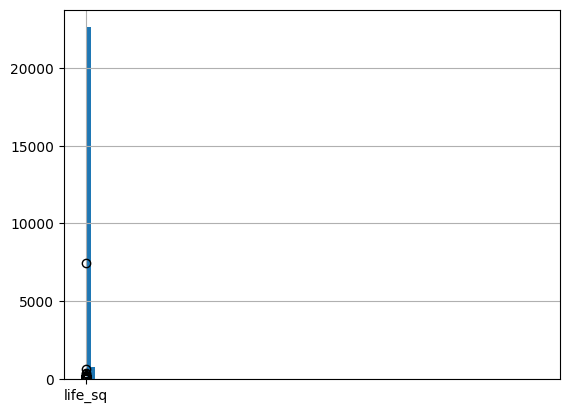

In [18]:
df['life_sq'].hist(bins=100)

df.boxplot(column=['life_sq'])

### What to do?
While outliers are not hard to see, it is tricky to clean them. It depends on the dataset and the goal of the project.

The methods of handling outliers are somewhat similar to missing data. We could drop, replace, or even just keep them.

## Unnecessary data
Those are a lot of hard work for missing data and outliers! Let’s clean something more straightforward in this section: the unnecessary data.

#### Unnecessary type #1: repetitive & uninformative
One column can have many observations being the same value. When an extremely high percentage of the column has a repetitive value, we should investigate whether such a column provides valuable information.

We can generate a list of columns with a high percentage of the same value. For example, we specify below to show columns with over 99.9% rows being the same value.

In [19]:
num_rows = len(df)

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.999:
        print('{0}: {1:.2f}%'.format(col, top_pct*100))
        print(cnts)
        print()

In fact, there’s no such column in our example dataset.

#### What to do?
If there is one column with a high percentage of the same value, we should look into it to see if it’s informative. We can drop them when they are not, e.g., when the column has 100% being the same value.

#### Unnecessary type #2: irrelevant
Again, the data needs to provide valuable information for the project. If the features are not related to the question we are trying to solve, they are irrelevant.

#### How to find out?
We need to skim through the features to identify irrelevant ones. For example, a feature recording the temperature in the US wouldn’t provide direct insights into housing prices in Russia.

#### What to do?
When the features are not serving the project’s goal, we can remove them. You could use the 'drop' method in pandas.

#### Unnecessary type #3: duplicates
The duplicate data is when copies of the same observation exist. Let’s look at 2 main types of duplicate data and clean them in Python.

#### Duplicates type #1: all columns based
#### How to find out?
This is easy to understand. Such duplicate occurs when all the columns’ values within the observations are the same.

We can use the duplicated method to grab the boolean values of whether a row is duplicated, and then use it to filter for duplicated rows from df.

We can use the drop_duplicates method. But this will return the same DataFrame since there weren’t any duplicates.

In [20]:
df[df.duplicated()]
df.drop_duplicates()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28890,24023,2014-10-28,135,59.0,9.0,57.0,4.0,2007.0,3.0,22.0,...,49,16,5,19,36,0,5,115,13,56500000
28891,21855,2014-08-25,46,46.0,17.0,99.0,6.0,NaN,3.0,9.0,...,2,2,0,1,14,1,0,13,0,6670000
28892,21737,2014-08-21,71,71.0,5.0,99.0,6.0,NaN,2.0,9.0,...,13,1,0,5,15,0,3,35,3,8484365
28893,20725,2014-07-10,47,47.0,4.0,99.0,2.0,NaN,1.0,1.0,...,23,4,1,11,14,0,1,72,9,10238400


## Inconsistent data

#### Inconsistent type #1: capitalization
Inconsistent use of upper and lower cases in categorical values is typical. We need to clean it since Python is case-sensitive.

In [21]:
df['sub_area'].value_counts(dropna=False)
df['sub_area_lower'] = df['sub_area'].str.lower()
df['sub_area_lower'].value_counts(dropna=False)

sub_area_lower
nekrasovka                        1511
poselenie sosenskoe               1426
poselenie vnukovskoe              1305
poselenie moskovskij               866
tverskoe                           620
                                  ... 
molzhaninovskoe                      3
poselenie shhapovskoe                2
poselenie kievskij                   2
poselenie mihajlovo-jarcevskoe       1
poselenie klenovskoe                 1
Name: count, Length: 146, dtype: int64

#### Inconsistent type #2: data types
Another standardization we often need to look at is the data types.

We could also print out one column to take a look. Let’s try timestamp.

In [22]:
df['timestamp']

0        2011-08-20
1        2011-08-23
2        2011-08-27
3        2011-09-01
4        2011-09-05
            ...    
28890    2014-10-28
28891    2014-08-25
28892    2014-08-21
28893    2014-07-10
28894    2014-12-06
Name: timestamp, Length: 28895, dtype: object

timestamp has dtype of object while it records dates.

In [23]:
df['timestamp_dt'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d')
df['year'] = df['timestamp_dt'].dt.year
df['month'] = df['timestamp_dt'].dt.month
df['weekday'] = df['timestamp_dt'].dt.weekday

df[['timestamp_dt', 'year', 'month', 'weekday']].head()

,timestamp_dt,year,month,weekday
0,2011-08-20,2011,8,5
1,2011-08-23,2011,8,1
2,2011-08-27,2011,8,5
3,2011-09-01,2011,9,3
4,2011-09-05,2011,9,0


#### Inconsistent type #3: typos of categorical values
A categorical column takes on a limited and usually fixed number of possible values. Sometimes it shows other values due to reasons like typos.

Let’s see an example. Within the code below:

* We generate a new DataFrame, df_city_ex
There is only one column that stores the city names. There are misspellings. For example, ‘torontoo’ and ‘tronto’ both refer to the city of ‘toronto’.
* The variable cities stores the 4 correct names of ‘toronto’, ‘vancouver’, ‘montreal’, and ‘calgary’.
* To identify typos, we use fuzzy logic matches. We use edit_distance from nltk, which measures the number of operations (e.g., substitution, insertion, deletion) needed to change from one string into another string.
* We calculate the distance between the actual values and the correct values.

In [24]:
df_city_ex = pd.DataFrame(data={'city': ['torontoo', 'toronto', 'tronto', 'vancouver', 'vancover', 'vancouvr', 'montreal', 'calgary']})

cities = ['toronto', 'vancouver', 'montreal', 'calgary']
from nltk.metrics import edit_distance
for city in cities:
    df_city_ex[f'city_distance_{city}'] = df_city_ex['city'].map(lambda x: edit_distance(x, city))

df_city_ex

,city,city_distance_toronto,city_distance_vancouver,city_distance_montreal,city_distance_calgary
0,torontoo,1,8,7,8
1,toronto,0,8,7,7
2,tronto,1,8,6,7
3,vancouver,8,0,8,8
4,vancover,7,1,7,7
5,vancouvr,7,1,7,7
6,montreal,7,8,0,8
7,calgary,7,8,8,0


#### What to do?
We can set criteria to convert these typos to the correct values. For example, the below code sets all the values within 2 characters distance from ‘toronto’/’vancouver’ to be ‘toronto’/’vancouver’.

In [25]:
msk = df_city_ex['city_distance_toronto'] <= 2
df_city_ex.loc[msk, 'city'] = 'toronto'

msk = df_city_ex['city_distance_vancouver'] <= 2
df_city_ex.loc[msk, 'city'] = 'vancouver'

df_city_ex

,city,city_distance_toronto,city_distance_vancouver,city_distance_montreal,city_distance_calgary
0,toronto,1,8,7,8
1,toronto,0,8,7,7
2,toronto,1,8,6,7
3,vancouver,8,0,8,8
4,vancouver,7,1,7,7
5,vancouver,7,1,7,7
6,montreal,7,8,0,8
7,calgary,7,8,8,0


#### Inconsistent type #4: addresses
Addresses and location data can have various inconsistencies like case differences, extra whitespace, abbreviations, and formatting issues. We need to standardize them for consistent data analysis.

In this dataset, we have location/area information in the 'sub_area' column. Let's identify and clean inconsistencies such as:
* Case inconsistencies (mixed case, all uppercase, all lowercase)
* Extra whitespace (multiple spaces, leading/trailing spaces)
* Punctuation issues (apostrophes, e.g., "Tekstil'shhiki" should become "Tekstilshhiki")
* Typos and misspellings (using fuzzy matching with edit_distance)
* Formatting inconsistencies

In [67]:
# Step 1: Examine the original sub_area column
# This shows the current state of addresses and identifies potential issues

print("=" * 60)
print("STEP 1: EXAMINING ORIGINAL ADDRESS DATA")
print("=" * 60)

print(f"\nTotal unique sub_area values: {df['sub_area'].nunique()}")
print(f"Total rows: {len(df)}")
print("\nTop 20 most common sub_area values:")
print("-" * 60)
df['sub_area'].value_counts().head(20)

STEP 1: EXAMINING ORIGINAL ADDRESS DATA

Total unique sub_area values: 146
Total rows: 28895

Top 20 most common sub_area values:
------------------------------------------------------------


sub_area
Nekrasovka                  1511
Poselenie Sosenskoe         1426
Poselenie Vnukovskoe        1305
Poselenie Moskovskij         866
Tverskoe                     620
Poselenie Voskresenskoe      605
Mitino                       604
Mar'ino                      507
Poselenie Filimonkovskoe     454
Juzhnoe Butovo               450
Solncevo                     416
Poselenie Shherbinka         399
Krjukovo                     394
Zapadnoe Degunino            392
Otradnoe                     349
Poselenie Desjonovskoe       321
Nagatinskij Zaton            305
Bogorodskoe                  303
Ljublino                     295
Gol'janovo                   294
Name: count, dtype: int64

In [68]:
# Step 2: Check for case inconsistencies
# Find entries with inconsistent casing (all lowercase or all uppercase)

print("=" * 60)
print("STEP 2: CHECKING FOR CASE INCONSISTENCIES")
print("=" * 60)

case_inconsistent = df[df['sub_area'].str.islower() | df['sub_area'].str.isupper()]

if len(case_inconsistent) > 0:
    print(f"\n⚠️  Found {len(case_inconsistent)} entries with inconsistent case!")
    print(f"   These entries are either ALL lowercase or ALL uppercase")
    print(f"\nExamples of inconsistent case:")
    print("-" * 60)
    inconsistent_examples = case_inconsistent['sub_area'].unique()[:10]
    for example in inconsistent_examples:
        print(f"  • '{example}'")
    print(f"\nFull list of inconsistent values:")
    case_inconsistent['sub_area'].value_counts()
else:
    print("\n✓ No obvious case inconsistencies found")
    print("   All addresses appear to have proper capitalization")


STEP 2: CHECKING FOR CASE INCONSISTENCIES

✓ No obvious case inconsistencies found
   All addresses appear to have proper capitalization


In [69]:
# Step 3: Check for extra whitespace
# Find entries with multiple spaces or leading/trailing spaces

print("=" * 60)
print("STEP 3: CHECKING FOR EXTRA WHITESPACE")
print("=" * 60)

# Check for multiple spaces
multiple_spaces = df[df['sub_area'].str.contains(r'\s{2,}', regex=True, na=False)]
# Check for leading/trailing spaces (by comparing stripped vs original)
leading_trailing = df[df['sub_area'] != df['sub_area'].str.strip()]

if len(multiple_spaces) > 0 or len(leading_trailing) > 0:
    print(f"\n⚠️  Found whitespace issues!")
    if len(multiple_spaces) > 0:
        print(f"   • {len(multiple_spaces)} entries with multiple consecutive spaces")
        print(f"\nExamples of multiple spaces:")
        print("-" * 60)
        for example in multiple_spaces['sub_area'].unique()[:5]:
            # Show spaces visually
            example_visual = example.replace(' ', '·')
            print(f"  '{example_visual}' (original: '{example}')")
    if len(leading_trailing) > 0:
        print(f"\n   • {len(leading_trailing)} entries with leading/trailing spaces")
        print(f"\nExamples of leading/trailing spaces:")
        print("-" * 60)
        for example in leading_trailing['sub_area'].unique()[:5]:
            example_visual = example.replace(' ', '·')
            print(f"  '{example_visual}' (original: '{example}')")
else:
    print("\n✓ No extra whitespace found")
    print("   All addresses have proper spacing")


STEP 3: CHECKING FOR EXTRA WHITESPACE

✓ No extra whitespace found
   All addresses have proper spacing


In [70]:
# Step 3.5: Check for punctuation issues
# Find entries with apostrophes, hyphens, or other punctuation that might need handling

print("=" * 60)
print("STEP 3.5: CHECKING FOR PUNCTUATION ISSUES")
print("=" * 60)

# Check for apostrophes
apostrophe_entries = df[df['sub_area'].str.contains("'", na=False)]
# Check for hyphens
hyphen_entries = df[df['sub_area'].str.contains("-", na=False)]

if len(apostrophe_entries) > 0 or len(hyphen_entries) > 0:
    print(f"\n⚠️  Found addresses with punctuation!")
    
    if len(apostrophe_entries) > 0:
        print(f"\n   • {len(apostrophe_entries)} entries with apostrophes (')")
        print(f"\nExamples of addresses with apostrophes:")
        print("-" * 60)
        apostrophe_examples = apostrophe_entries['sub_area'].unique()[:10]
        for example in apostrophe_examples:
            # Show what it would look like without apostrophe
            cleaned_example = example.replace("'", "")
            print(f"  '{example}' → '{cleaned_example}'")
        
        print(f"\n   Value counts of addresses with apostrophes:")
        apostrophe_entries['sub_area'].value_counts().head(10)
    
    if len(hyphen_entries) > 0:
        print(f"\n   • {len(hyphen_entries)} entries with hyphens (-)")
        print(f"\nExamples of addresses with hyphens:")
        print("-" * 60)
        hyphen_examples = hyphen_entries['sub_area'].unique()[:10]
        for example in hyphen_examples:
            print(f"  '{example}'")
        
        print(f"\n   Value counts of addresses with hyphens:")
        hyphen_entries['sub_area'].value_counts().head(10)
else:
    print("\n✓ No punctuation issues found")
    print("   All addresses have standard formatting")


STEP 3.5: CHECKING FOR PUNCTUATION ISSUES

⚠️  Found addresses with punctuation!

   • 2143 entries with apostrophes (')

Examples of addresses with apostrophes:
------------------------------------------------------------
  'Tekstil'shhiki' → 'Tekstilshhiki'
  'Sokol'niki' → 'Sokolniki'
  'Mar'ino' → 'Marino'
  'Kuz'minki' → 'Kuzminki'
  'Gol'janovo' → 'Goljanovo'
  'Chertanovo Central'noe' → 'Chertanovo Centralnoe'
  'Moskvorech'e-Saburovo' → 'Moskvoreche-Saburovo'
  'Kon'kovo' → 'Konkovo'
  'Krasnosel'skoe' → 'Krasnoselskoe'
  'Mar'ina Roshha' → 'Marina Roshha'

   Value counts of addresses with apostrophes:

   • 1946 entries with hyphens (-)

Examples of addresses with hyphens:
------------------------------------------------------------
  'Kosino-Uhtomskoe'
  'Novo-Peredelkino'
  'Moskvorech'e-Saburovo'
  'Vyhino-Zhulebino'
  'Orehovo-Borisovo Severnoe'
  'Ochakovo-Matveevskoe'
  'Orehovo-Borisovo Juzhnoe'
  'Troparevo-Nikulino'
  'Nagatino-Sadovniki'
  'Horoshevo-Mnevniki'

   V

In [71]:
# Step 3.6: Check for typos in addresses
# Use fuzzy matching to identify potential typos and correct them

print("=" * 60)
print("STEP 3.6: CHECKING FOR TYPOS IN ADDRESSES")
print("=" * 60)

# Import nltk edit_distance for fuzzy matching
try:
    from nltk.metrics import edit_distance
    print("\n✓ Using edit_distance from nltk for typo detection")
except ImportError:
    print("\n⚠️  nltk not found. Installing...")
    import subprocess
    subprocess.check_call(['pip', 'install', 'nltk', '-q'])
    from nltk.metrics import edit_distance
    print("✓ nltk installed successfully")

# Get the most common addresses (these are likely correct/standard)
print("\nIdentifying standard/correct address names...")
address_counts = df['sub_area'].value_counts()
# Consider addresses that appear at least 5 times as "standard" (likely correct)
standard_addresses = address_counts[address_counts >= 5].index.tolist()
print(f"   Found {len(standard_addresses)} standard addresses (appearing ≥5 times)")

# Get less common addresses (potential typos)
less_common_addresses = address_counts[address_counts < 5].index.tolist()
print(f"   Found {len(less_common_addresses)} less common addresses (potential typos)")

# Check for typos: compare less common addresses with standard ones
print("\nChecking for typos using edit_distance...")
print("-" * 60)

typo_corrections = {}
max_edit_distance = 2  # Maximum allowed edit distance for typo correction

for uncommon_addr in less_common_addresses:
    best_match = None
    min_distance = float('inf')
    
    # Find the closest standard address
    for standard_addr in standard_addresses:
        distance = edit_distance(uncommon_addr.lower(), standard_addr.lower())
        if distance < min_distance and distance <= max_edit_distance:
            min_distance = distance
            best_match = standard_addr
    
    if best_match:
        typo_corrections[uncommon_addr] = best_match

if len(typo_corrections) > 0:
    print(f"\n⚠️  Found {len(typo_corrections)} potential typos!")
    print("\nPotential typos and their corrections:")
    print("-" * 60)
    for typo, correction in list(typo_corrections.items())[:15]:
        distance = edit_distance(typo.lower(), correction.lower())
        print(f"  '{typo}' → '{correction}' (edit distance: {distance})")
    
    if len(typo_corrections) > 15:
        print(f"\n  ... and {len(typo_corrections) - 15} more")
    
    # Show how many rows would be affected
    total_affected = df[df['sub_area'].isin(typo_corrections.keys())].shape[0]
    print(f"\n   Total rows that would be corrected: {total_affected}")
    
    # Store corrections for use in Step 4
    globals()['typo_corrections'] = typo_corrections
else:
    print("\n✓ No typos detected!")
    print("   All addresses appear to be correctly spelled")
    globals()['typo_corrections'] = {}


STEP 3.6: CHECKING FOR TYPOS IN ADDRESSES

✓ Using edit_distance from nltk for typo detection

Identifying standard/correct address names...
   Found 141 standard addresses (appearing ≥5 times)
   Found 5 less common addresses (potential typos)

Checking for typos using edit_distance...
------------------------------------------------------------

✓ No typos detected!
   All addresses appear to be correctly spelled


In [73]:
# Step 4: Standardize the addresses
# Apply cleaning operations to create a consistent format

print("=" * 60)
print("STEP 4: STANDARDIZING ADDRESSES")
print("=" * 60)

# Create a cleaned version of sub_area
df['sub_area_cleaned'] = df['sub_area'].copy()

print("\nApplying cleaning operations (in standard order):")
print("=" * 60)
print("Standard order: Typos → Punctuation → Whitespace → Case")
print("This order ensures data accuracy is fixed first, then formatting is standardized")
print("=" * 60)

# Step 1: Correct typos first (fix data accuracy before other transformations)
print("\n1. Correcting typos (if any were found)...")
# Apply typo corrections if they were identified in Step 3.6
if 'typo_corrections' in globals() and len(typo_corrections) > 0:
    typo_count = 0
    for typo, correction in typo_corrections.items():
        mask = df['sub_area_cleaned'] == typo
        if mask.sum() > 0:
            df.loc[mask, 'sub_area_cleaned'] = correction
            typo_count += mask.sum()
    if typo_count > 0:
        print(f"   ✓ Corrected {typo_count} entries with typos")
    else:
        print("   ✓ No typos to correct")
else:
    print("   ✓ No typos detected in previous step")

# Step 2: Remove punctuation (clean special characters)
print("\n2. Removing punctuation (apostrophes)...")
# Remove apostrophes as requested (e.g., "Tekstil'shhiki" → "Tekstilshhiki")
before_punct = df['sub_area_cleaned'].str.contains("'", na=False).sum()
df['sub_area_cleaned'] = df['sub_area_cleaned'].str.replace("'", "", regex=False)
after_punct = df['sub_area_cleaned'].str.contains("'", na=False).sum()
if before_punct > 0:
    print(f"   ✓ Removed apostrophes from {before_punct} entries")
else:
    print("   ✓ No apostrophes found")

# Step 3: Remove leading/trailing spaces (clean whitespace)
print("\n3. Removing leading/trailing spaces...")
before_strip = (df['sub_area_cleaned'] != df['sub_area_cleaned'].str.strip()).sum()
df['sub_area_cleaned'] = df['sub_area_cleaned'].str.strip()
if before_strip > 0:
    print(f"   ✓ Removed leading/trailing spaces from {before_strip} entries")
else:
    print("   ✓ No leading/trailing spaces found")

# Step 4: Normalize multiple spaces to single space
print("\n4. Normalizing multiple spaces to single space...")
before_norm = df['sub_area_cleaned'].str.contains(r'\s{2,}', regex=True, na=False).sum()
df['sub_area_cleaned'] = df['sub_area_cleaned'].str.replace(r'\s+', ' ', regex=True)
after_norm = df['sub_area_cleaned'].str.contains(r'\s{2,}', regex=True, na=False).sum()
if before_norm > 0:
    print(f"   ✓ Normalized spaces in {before_norm} entries")
else:
    print("   ✓ No multiple spaces found")

# Step 5: Standardize case (final formatting step)
print("\n5. Converting to Title Case (first letter of each word capitalized)...")
df['sub_area_cleaned'] = df['sub_area_cleaned'].str.title()
print("   ✓ Case standardization complete")

print("\n✓ Cleaning complete!")
print(f"   Original unique values: {df['sub_area'].nunique()}")
print(f"   Cleaned unique values: {df['sub_area_cleaned'].nunique()}")

# Show a sample of cleaned addresses
print("\nSample of cleaned addresses:")
print("-" * 60)
sample_df = df[['sub_area', 'sub_area_cleaned']].head(10)
for idx, row in sample_df.iterrows():
    if row['sub_area'] != row['sub_area_cleaned']:
        print(f"  '{row['sub_area']}' → '{row['sub_area_cleaned']}'")
    else:
        print(f"  '{row['sub_area']}' (no change)")

# Show specific examples of typo corrections
if 'typo_corrections' in globals() and len(typo_corrections) > 0:
    print("\n" + "-" * 60)
    print("Examples of typo corrections:")
    print("-" * 60)
    typo_examples = df[df['sub_area'].isin(typo_corrections.keys())][['sub_area', 'sub_area_cleaned']].head(10)
    for idx, row in typo_examples.iterrows():
        if row['sub_area'] != row['sub_area_cleaned']:
            print(f"  '{row['sub_area']}' → '{row['sub_area_cleaned']}' (typo corrected)")

# Show specific examples of apostrophe removal
print("\n" + "-" * 60)
print("Examples of apostrophe removal:")
print("-" * 60)
apostrophe_examples = df[df['sub_area'].str.contains("'", na=False)][['sub_area', 'sub_area_cleaned']].head(10)
for idx, row in apostrophe_examples.iterrows():
    print(f"  '{row['sub_area']}' → '{row['sub_area_cleaned']}'")


STEP 4: STANDARDIZING ADDRESSES

Applying cleaning operations (in standard order):
Standard order: Typos → Punctuation → Whitespace → Case
This order ensures data accuracy is fixed first, then formatting is standardized

1. Correcting typos (if any were found)...
   ✓ No typos detected in previous step

2. Removing punctuation (apostrophes)...
   ✓ Removed apostrophes from 2143 entries

3. Removing leading/trailing spaces...
   ✓ No leading/trailing spaces found

4. Normalizing multiple spaces to single space...
   ✓ No multiple spaces found

5. Converting to Title Case (first letter of each word capitalized)...
   ✓ Case standardization complete

✓ Cleaning complete!
   Original unique values: 146
   Cleaned unique values: 146

Sample of cleaned addresses:
------------------------------------------------------------
  'Bibirevo' (no change)
  'Nagatinskij Zaton' (no change)
  'Tekstil'shhiki' → 'Tekstilshhiki'
  'Mitino' (no change)
  'Basmannoe' (no change)
  'Nizhegorodskoe' (no cha

In [74]:
# Step 5: Compare original vs cleaned addresses
# Show side-by-side comparison to verify cleaning worked correctly

print("=" * 60)
print("STEP 5: COMPARING ORIGINAL VS CLEANED ADDRESSES")
print("=" * 60)

# Get unique values and create comparison
original_unique = df['sub_area'].unique()[:20]
cleaned_unique = df['sub_area_cleaned'].unique()[:20]

comparison = pd.DataFrame({
    'Original': original_unique,
    'Cleaned': cleaned_unique
})

print("\nSide-by-side comparison (first 20 unique values):")
print("-" * 60)
comparison

# Show statistics
print("\n" + "=" * 60)
print("SUMMARY STATISTICS")
print("=" * 60)
print(f"Total rows in dataset: {len(df):,}")
print(f"Unique original values: {df['sub_area'].nunique()}")
print(f"Unique cleaned values: {df['sub_area_cleaned'].nunique()}")
print(f"Values that changed: {(df['sub_area'] != df['sub_area_cleaned']).sum()}")
print(f"Values unchanged: {(df['sub_area'] == df['sub_area_cleaned']).sum()}")


STEP 5: COMPARING ORIGINAL VS CLEANED ADDRESSES

Side-by-side comparison (first 20 unique values):
------------------------------------------------------------

SUMMARY STATISTICS
Total rows in dataset: 28,895
Unique original values: 146
Unique cleaned values: 146
Values that changed: 2295
Values unchanged: 26600


In [75]:
# Step 6: Check which entries were modified
# Identify exactly which rows had their addresses changed

print("=" * 60)
print("STEP 6: IDENTIFYING MODIFIED ENTRIES")
print("=" * 60)

changed = df[df['sub_area'] != df['sub_area_cleaned']]

if len(changed) > 0:
    print(f"\n⚠️  {len(changed):,} entries were modified during cleaning")
    print(f"   This represents {len(changed)/len(df)*100:.2f}% of the dataset")
    
    print("\n" + "-" * 60)
    print("SAMPLE OF CHANGES (showing first 15 modifications):")
    print("-" * 60)
    
    # Show changes in a clear format
    changes_sample = changed[['sub_area', 'sub_area_cleaned']].head(15)
    for idx, row in changes_sample.iterrows():
        original = row['sub_area']
        cleaned = row['sub_area_cleaned']
        print(f"  Row {idx:5d}: '{original}' → '{cleaned}'")
    
    print("\n" + "-" * 60)
    print("FULL DETAILS OF ALL CHANGES:")
    print("-" * 60)
    changed[['sub_area', 'sub_area_cleaned']].head(20)
    
    # Show value counts of changed entries
    print("\n" + "-" * 60)
    print("VALUE COUNTS OF MODIFIED ENTRIES:")
    print("-" * 60)
    changed['sub_area'].value_counts().head(10)
    
else:
    print("\n✓ No changes needed - addresses were already consistent!")
    print("   All addresses were already in the correct format")


STEP 6: IDENTIFYING MODIFIED ENTRIES

⚠️  2,295 entries were modified during cleaning
   This represents 7.94% of the dataset

------------------------------------------------------------
SAMPLE OF CHANGES (showing first 15 modifications):
------------------------------------------------------------
  Row     2: 'Tekstil'shhiki' → 'Tekstilshhiki'
  Row     6: 'Sokol'niki' → 'Sokolniki'
  Row    15: 'Mar'ino' → 'Marino'
  Row    16: 'Kuz'minki' → 'Kuzminki'
  Row    19: 'Gol'janovo' → 'Goljanovo'
  Row    23: 'Chertanovo Central'noe' → 'Chertanovo Centralnoe'
  Row    33: 'Moskvorech'e-Saburovo' → 'Moskvoreche-Saburovo'
  Row    35: 'Mar'ino' → 'Marino'
  Row    43: 'Kon'kovo' → 'Konkovo'
  Row    52: 'Tekstil'shhiki' → 'Tekstilshhiki'
  Row    59: 'Chertanovo Central'noe' → 'Chertanovo Centralnoe'
  Row    77: 'Kuz'minki' → 'Kuzminki'
  Row    80: 'Gol'janovo' → 'Goljanovo'
  Row    89: 'Kon'kovo' → 'Konkovo'
  Row    97: 'Moskvorech'e-Saburovo' → 'Moskvoreche-Saburovo'

--------------

In [76]:
# Step 7: Apply changes (Optional)
# Replace the original column with cleaned values if desired

print("=" * 60)
print("STEP 7: APPLYING CHANGES (OPTIONAL)")
print("=" * 60)

print("\nCurrent status:")
print(f"  • Original column: 'sub_area' ({df['sub_area'].nunique()} unique values)")
print(f"  • Cleaned column: 'sub_area_cleaned' ({df['sub_area_cleaned'].nunique()} unique values)")

print("\n" + "-" * 60)
print("TO PERMANENTLY APPLY THE CLEANED VALUES:")
print("-" * 60)
print("Uncomment and run the line below to replace the original 'sub_area' column")
print("with the cleaned version:")
print("\n  df['sub_area'] = df['sub_area_cleaned']")
print("\n⚠️  WARNING: This will permanently modify your dataset!")
print("   Make sure you've reviewed all changes in the previous steps.")

# Uncomment the line below to apply changes:
# df['sub_area'] = df['sub_area_cleaned']
# print("\n✓ Changes applied! Original 'sub_area' column has been updated.")


STEP 7: APPLYING CHANGES (OPTIONAL)

Current status:
  • Original column: 'sub_area' (146 unique values)
  • Cleaned column: 'sub_area_cleaned' (146 unique values)

------------------------------------------------------------
TO PERMANENTLY APPLY THE CLEANED VALUES:
------------------------------------------------------------
Uncomment and run the line below to replace the original 'sub_area' column
with the cleaned version:

  df['sub_area'] = df['sub_area_cleaned']

⚠️  WARNING: This will permanently modify your dataset!
   Make sure you've reviewed all changes in the previous steps.


#### Summary

The address cleaning process has been completed.

**What we cleaned (in standard order):**
1.  **Typo correction** - Fixed misspellings using fuzzy matching with edit_distance
2.  **Punctuation removal** - Removed apostrophes (e.g., "Tekstil'shhiki" → "Tekstilshhiki")
3.  **Whitespace cleaning** - Removed leading/trailing spaces and normalized multiple spaces
4.  **Case standardization** - Converted to Title Case (first letter of each word capitalized)

